In [35]:
#Importing packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#loading data 
data = pd.read_excel("EMOR-01-23VW+ DATA TABLES.xlsx", sheet_name= "Log Transformed Data")
meta = pd.read_excel("EMOR-01-23VW+ DATA TABLES.xlsx", sheet_name= "Sample Meta Data")
chemical = pd.read_excel("EMOR-01-23VW+ DATA TABLES.xlsx", sheet_name= "Chemical Annotation")



In [17]:
data

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119,999926158,999926235
0,EMOR-01435,-0.410780,0.441685,0.963750,-0.042691,0.321790,0.024211,-0.590003,-0.305086,-0.076376,...,-0.807218,0.232758,-1.292171,-1.161137,0.284856,-1.219892,1.600145,-2.036732,0.282701,-2.238514
1,EMOR-01436,0.268869,-0.242897,0.097492,-0.158424,-0.486104,0.039548,0.282260,-0.024766,-0.203307,...,-0.807218,0.024802,0.488500,0.181932,-0.006762,-0.116363,-0.206489,-2.036732,-0.676595,-2.238514
2,EMOR-01437,-0.524830,-0.421800,0.368537,0.100655,-0.151162,-0.018921,-0.074730,-0.477601,-0.101348,...,-0.807218,-0.241919,0.764237,0.319942,0.126871,0.657794,-1.121599,-0.125115,0.216583,-2.238514
3,EMOR-01438,-0.145787,0.023326,0.140031,0.620453,-0.203799,-0.316675,-0.201292,-0.386562,-0.275080,...,-0.807218,-0.153931,0.569757,0.203190,-0.173802,-1.219892,0.774637,-2.036732,-0.278778,-1.824883
4,EMOR-01439,0.415620,-0.071482,0.327615,-0.136614,0.121705,-0.405890,0.292579,1.028191,-0.301719,...,0.131462,0.385071,0.309744,-0.084261,-0.719768,0.139488,1.712703,-2.036732,-0.531758,-2.238514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,EMOR-01498,0.118674,-0.067060,-0.894732,-1.845804,1.046112,-0.126841,0.374247,-0.507467,0.394499,...,0.651735,0.263971,0.351045,-0.033397,-0.098439,-0.968790,-1.121881,-2.036732,0.262059,-2.238514
64,EMOR-01499,-0.588245,0.752326,0.172577,0.879433,-0.321589,-0.137239,0.127772,-0.542667,0.182070,...,1.240886,-0.235191,-0.266510,-0.393416,-0.522486,0.567461,0.000000,0.000000,-0.757712,-2.238514
65,EMOR-01500,-1.131730,0.260411,0.132900,-1.295447,0.181491,-0.007579,-0.424735,-0.510790,0.542245,...,0.634490,-0.130091,-0.886847,-0.769515,-0.613511,-0.035717,-2.988754,-2.036732,0.579861,-2.238514
66,EMOR-01501,0.282356,0.092303,-0.939644,-1.845804,0.148398,0.506839,0.171045,0.286930,0.492329,...,-0.807218,-0.059248,-0.279316,-0.541251,0.210688,-1.219892,1.196467,-2.036732,0.687022,-2.238514


In [18]:
#Extracting colnames
list(data.columns)

['PARENT_SAMPLE_NAME',
 35,
 50,
 55,
 62,
 71,
 93,
 98,
 111,
 112,
 132,
 136,
 144,
 158,
 171,
 179,
 180,
 181,
 182,
 189,
 192,
 194,
 197,
 207,
 208,
 209,
 212,
 215,
 229,
 231,
 234,
 235,
 240,
 241,
 244,
 249,
 250,
 252,
 254,
 266,
 267,
 272,
 273,
 275,
 278,
 279,
 297,
 302,
 313,
 327,
 330,
 331,
 338,
 339,
 340,
 342,
 344,
 355,
 356,
 358,
 361,
 363,
 376,
 381,
 391,
 397,
 405,
 407,
 409,
 415,
 418,
 424,
 432,
 437,
 439,
 444,
 445,
 452,
 460,
 461,
 466,
 477,
 480,
 482,
 491,
 498,
 500,
 501,
 503,
 504,
 512,
 519,
 533,
 535,
 536,
 537,
 561,
 563,
 564,
 565,
 566,
 572,
 796,
 798,
 799,
 800,
 803,
 806,
 811,
 815,
 821,
 823,
 825,
 826,
 827,
 828,
 849,
 872,
 878,
 881,
 888,
 889,
 891,
 892,
 893,
 913,
 917,
 922,
 923,
 925,
 926,
 932,
 935,
 1001,
 1002,
 1004,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1052,
 1053,
 1082,
 1083,
 1084,
 1087,
 1090,
 1094,
 1102,
 1104,
 1105,
 1110,
 1111,
 1113,
 1114,
 1123,
 1124,
 1125,
 11

In [19]:
#setting the first column as index
data = data.set_index('PARENT_SAMPLE_NAME')
data.index.names = [None]

In [20]:
#performing quantile normalization
rank_mean = data.stack().groupby(data.rank(method='first').stack().astype(int)).mean()
data_q = data.rank(method='min').stack().astype(int).map(rank_mean).unstack()

In [21]:
data_q

,35,50,55,62,71,93,98,111,112,132,...,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119,999926158,999926235
EMOR-01435,-0.663412,0.483725,0.874396,-0.181589,0.410518,-0.102462,-1.026857,-0.414596,-0.311318,0.308033,...,-1.413655,0.340907,-0.984524,-1.129820,0.524446,-1.413655,0.616655,-1.413655,0.131380,-1.413655
EMOR-01436,0.340907,-0.604443,-0.001599,-0.337533,-1.413655,0.102710,0.340907,-0.208137,-0.663412,-0.337533,...,-1.413655,-0.102462,0.410518,0.248198,-0.208137,-0.102462,-0.283505,-1.413655,-0.758546,-1.413655
EMOR-01437,-0.758546,-0.862952,0.483725,-0.026852,-0.440810,-0.231972,-0.283505,-0.577594,-0.440810,-0.153504,...,-1.413655,-0.938902,0.874396,0.524446,0.050498,0.667979,-0.725493,0.308033,0.025607,-1.413655
EMOR-01438,-0.414596,-0.102462,0.131380,0.447388,-0.633911,-0.862952,-0.440810,-0.494853,-0.758546,-0.283505,...,-1.413655,-0.549953,0.483725,0.277741,-0.522758,-1.413655,0.277741,-1.413655,-0.337533,0.616655
EMOR-01439,0.725996,-0.362419,0.410518,-0.311318,0.131380,-0.938902,0.376125,1.243658,-0.862952,-0.693002,...,0.447388,0.791330,0.219226,-0.283505,-1.129820,0.159960,0.791330,-1.413655,-0.633911,-1.413655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMOR-01498,0.050498,-0.337533,-1.129820,-1.413655,0.791330,-0.440810,0.616655,-0.604443,0.524446,0.219226,...,0.725996,0.410518,0.277741,-0.208137,-0.337533,-0.577594,-0.758546,-1.413655,0.102710,-1.413655
EMOR-01499,-0.984524,0.725996,0.219226,0.874396,-0.828155,-0.494853,0.025607,-0.693002,0.131380,0.791330,...,1.082595,-0.900235,-0.414596,-0.577594,-0.900235,0.566050,-0.153504,0.483725,-0.828155,-1.413655
EMOR-01500,-1.288845,0.248198,0.050498,-0.900235,0.248198,-0.208137,-0.900235,-0.633911,0.791330,0.102710,...,0.667979,-0.467891,-0.792503,-0.938902,-1.026857,-0.026852,-1.026857,-1.413655,0.410518,-1.413655
EMOR-01501,0.447388,0.025607,-1.202102,-1.413655,0.219226,0.972757,0.219226,0.219226,0.725996,0.667979,...,-1.413655,-0.337533,-0.440810,-0.633911,0.308033,-1.413655,0.447388,-1.413655,0.667979,-1.413655


In [22]:
# Elbow method to identify optimum number of clusters

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [23]:
#sum of sqaured error(array)
sse

[56144.27449030402,
 53535.97962154378,
 51210.39605686959,
 49600.369895534386,
 48481.60905058142,
 47794.5364468297,
 46566.05566276655,
 44647.103422019856,
 44099.44291019805]

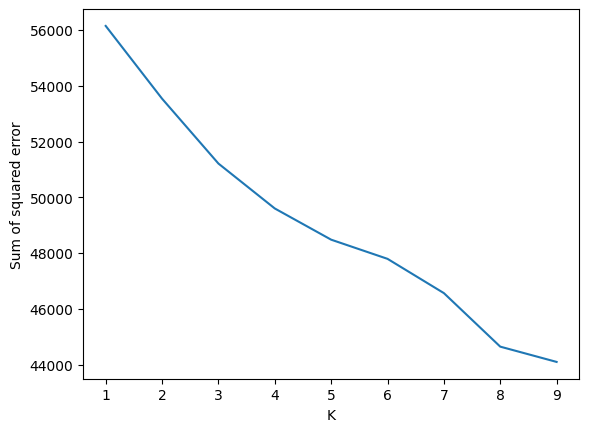

In [24]:
#plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [25]:
#k_means algorithm
km = KMeans(n_clusters=2)
yp = km.fit_predict(data_q)
yp



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1], dtype=int32)

In [26]:
silhouette_avg = silhouette_score(data_q, yp)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.0465408380563388


In [27]:
#adding a column names cluster to data_q, which assigns each sample to a cluster
data_q['cluster_k_means'] = yp

In [28]:
data_q

,35,50,55,62,71,93,98,111,112,132,...,999926097,999926106,999926107,999926108,999926109,999926111,999926119,999926158,999926235,cluster_k_means
EMOR-01435,-0.663412,0.483725,0.874396,-0.181589,0.410518,-0.102462,-1.026857,-0.414596,-0.311318,0.308033,...,0.340907,-0.984524,-1.129820,0.524446,-1.413655,0.616655,-1.413655,0.131380,-1.413655,1
EMOR-01436,0.340907,-0.604443,-0.001599,-0.337533,-1.413655,0.102710,0.340907,-0.208137,-0.663412,-0.337533,...,-0.102462,0.410518,0.248198,-0.208137,-0.102462,-0.283505,-1.413655,-0.758546,-1.413655,0
EMOR-01437,-0.758546,-0.862952,0.483725,-0.026852,-0.440810,-0.231972,-0.283505,-0.577594,-0.440810,-0.153504,...,-0.938902,0.874396,0.524446,0.050498,0.667979,-0.725493,0.308033,0.025607,-1.413655,0
EMOR-01438,-0.414596,-0.102462,0.131380,0.447388,-0.633911,-0.862952,-0.440810,-0.494853,-0.758546,-0.283505,...,-0.549953,0.483725,0.277741,-0.522758,-1.413655,0.277741,-1.413655,-0.337533,0.616655,0
EMOR-01439,0.725996,-0.362419,0.410518,-0.311318,0.131380,-0.938902,0.376125,1.243658,-0.862952,-0.693002,...,0.791330,0.219226,-0.283505,-1.129820,0.159960,0.791330,-1.413655,-0.633911,-1.413655,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMOR-01498,0.050498,-0.337533,-1.129820,-1.413655,0.791330,-0.440810,0.616655,-0.604443,0.524446,0.219226,...,0.410518,0.277741,-0.208137,-0.337533,-0.577594,-0.758546,-1.413655,0.102710,-1.413655,1
EMOR-01499,-0.984524,0.725996,0.219226,0.874396,-0.828155,-0.494853,0.025607,-0.693002,0.131380,0.791330,...,-0.900235,-0.414596,-0.577594,-0.900235,0.566050,-0.153504,0.483725,-0.828155,-1.413655,0
EMOR-01500,-1.288845,0.248198,0.050498,-0.900235,0.248198,-0.208137,-0.900235,-0.633911,0.791330,0.102710,...,-0.467891,-0.792503,-0.938902,-1.026857,-0.026852,-1.026857,-1.413655,0.410518,-1.413655,1
EMOR-01501,0.447388,0.025607,-1.202102,-1.413655,0.219226,0.972757,0.219226,0.219226,0.725996,0.667979,...,-0.337533,-0.440810,-0.633911,0.308033,-1.413655,0.447388,-1.413655,0.667979,-1.413655,1


In [30]:
# Dimensionality reduction of the data in order to visualize it
# Select columns for PCA, excluding the 'cluster' column
columns_for_pca = [col for col in data.columns if col != 'cluster']
data_reduced = PCA(n_components=2).fit_transform(data_q[columns_for_pca])

In [32]:
data_reduced

array([[ -7.52688178,   7.17040747],
       [  5.99384318,   0.24701825],
       [  2.8922391 , -11.1831164 ],
       [  8.38570497,  -0.78485435],
       [  7.65572816,   3.08716499],
       [-10.26758895,  10.15581846],
       [ 10.90102476,  -3.15779344],
       [ -8.96075325,  -1.7640579 ],
       [ -6.24200299,   4.31910428],
       [ -8.79497365,   2.24100859],
       [ -4.472722  ,   5.55358511],
       [  9.39851688,  10.2720098 ],
       [  6.60899489,  18.44032469],
       [  9.38561658,   1.60003147],
       [  5.92360105,   6.57563192],
       [  9.91863772,   3.5888656 ],
       [  6.16187686,   1.73736307],
       [ -2.59709161,  -4.49627704],
       [-11.81013689,   3.82787858],
       [  6.1342334 ,   2.83940525],
       [  2.74188308,  -7.95870962],
       [ 15.09634602,  -9.30662005],
       [ 13.18255702,  -0.96964372],
       [ -8.26574585,  -2.92111383],
       [  8.39481587,   6.63119418],
       [ -5.03701212,   7.04495176],
       [ -9.43311147,   6.26508214],
 

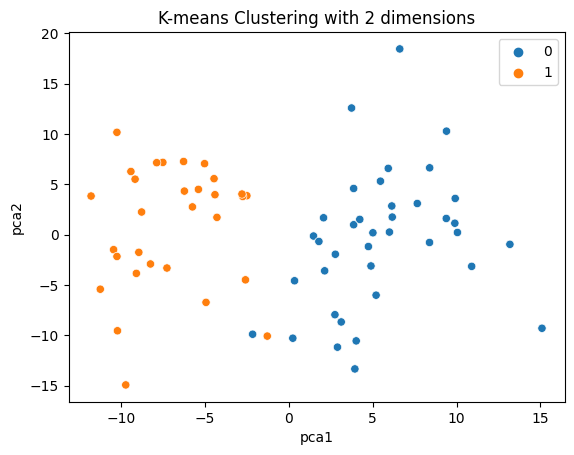

In [46]:
# Visualizing the kmeans clustering after linear dimensionality reduction
results = pd.DataFrame(data_reduced, columns=['pca1', 'pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=km.labels_, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()


In [41]:
results

,pca1,pca2
0,-7.526882,7.170407
1,5.993843,0.247018
2,2.892239,-11.183116
3,8.385705,-0.784854
4,7.655728,3.087165
...,...,...
63,-5.404841,4.489172
64,1.784833,-0.683917
65,-2.761912,3.786411
66,-7.282748,-3.321791


#### SPECTRAL CLUSTERING



In [6]:
#scaling the data
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(data.to_numpy())
df_scaled = pd.DataFrame(df_scaled)

In [7]:
rank_mean = df_scaled.stack().groupby(df_scaled.rank(method='first').stack().astype(int)).mean()
data_q_1 = data.rank(method='min').stack().astype(int).map(rank_mean).unstack()

In [8]:
# Reset the index and rename the columns
data_q_1 = data_q_1.reset_index().rename(columns={'index': 'PARENT_SAMPLE_NAME'})

In [9]:
data_q_1

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119,999926158,999926235
0,EMOR-01435,-0.752730,0.926890,1.484312,-0.037432,0.821243,0.077720,-1.343964,-0.378306,-0.225942,...,-2.108465,0.721878,-1.269234,-1.534505,0.985020,-2.108465,1.117576,-2.108465,0.419283,-2.108465
1,EMOR-01436,0.721878,-0.664110,0.226350,-0.263806,-2.108465,0.377561,0.721878,-0.075821,-0.752730,...,-2.108465,0.077720,0.821243,0.586520,-0.075821,0.077720,-0.186147,-2.108465,-0.900938,-2.108465
2,EMOR-01437,-0.900938,-1.065325,0.926890,0.188931,-0.416662,-0.111591,-0.186147,-0.622684,-0.416662,...,-2.108465,-1.190713,1.484312,0.985020,0.302072,1.189960,-0.848573,0.674282,0.265727,-2.108465
3,EMOR-01438,-0.378306,0.077720,0.419283,0.874530,-0.708985,-1.065325,-0.416662,-0.497466,-0.900938,...,-2.108465,-0.579789,0.926890,0.629840,-0.538351,-2.108465,0.629840,-2.108465,-0.263806,1.117576
4,EMOR-01439,1.273373,-0.300874,0.821243,-0.225942,0.419283,-1.190713,0.772349,2.024463,-1.065325,...,0.874530,1.366337,0.544689,-0.186147,-1.534505,0.459541,1.366337,-2.108465,-0.708985,-2.108465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,EMOR-01498,0.302072,-0.263806,-1.534505,-2.108465,1.366337,-0.416662,1.117576,-0.664110,0.985020,...,1.273373,0.821243,0.629840,-0.075821,-0.263806,-0.622684,-0.900938,-2.108465,0.377561,-2.108465
64,EMOR-01499,-1.269234,1.273373,0.544689,1.484312,-1.010825,-0.497466,0.265727,-0.798159,0.419283,...,1.786841,-1.124088,-0.378306,-0.622684,-1.124088,1.045801,0.002400,0.926890,-1.010825,-2.108465
65,EMOR-01500,-1.836207,0.586520,0.302072,-1.124088,0.586520,-0.075821,-1.124088,-0.708985,1.366337,...,1.189960,-0.456472,-0.954113,-1.190713,-1.343964,0.188931,-1.343964,-2.108465,0.821243,-2.108465
66,EMOR-01501,0.874530,0.265727,-1.667613,-2.108465,0.544689,1.623978,0.544689,0.544689,1.273373,...,-2.108465,-0.263806,-0.416662,-0.708985,0.674282,-2.108465,0.874530,-2.108465,1.189960,-2.108465


In [10]:
#setting the first column as index
data_q_1 = data_q_1.set_index('PARENT_SAMPLE_NAME')
data_q_1.index.names = [None]

In [11]:
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(data_q_1)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
 
X_principal = X_principal.reset_index(drop=True)
X_principal

,P1,P2
0,-11.451367,11.331508
1,9.412734,-0.018424
2,3.613777,-16.906380
3,12.189984,-1.908234
4,12.706997,4.869113
...,...,...
63,-8.182085,6.804017
64,2.536661,-0.944743
65,-4.081730,5.618423
66,-10.874253,-4.941585


In [12]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

labels_rbf

array([1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1,
       0, 1], dtype=int32)

In [13]:
#adding a column names cluster to data_q, which assigns each sample to a cluster
data_q_1['cluster_spectral'] = labels_rbf

In [25]:
data_q_1

,35,50,55,62,71,93,98,111,112,132,...,999926097,999926106,999926107,999926108,999926109,999926111,999926119,999926158,999926235,cluster_spectral
EMOR-01435,-0.752730,0.926890,1.484312,-0.037432,0.821243,0.077720,-1.343964,-0.378306,-0.225942,0.674282,...,0.721878,-1.269234,-1.534505,0.985020,-2.108465,1.117576,-2.108465,0.419283,-2.108465,0
EMOR-01436,0.721878,-0.664110,0.226350,-0.263806,-2.108465,0.377561,0.721878,-0.075821,-0.752730,-0.263806,...,0.077720,0.821243,0.586520,-0.075821,0.077720,-0.186147,-2.108465,-0.900938,-2.108465,1
EMOR-01437,-0.900938,-1.065325,0.926890,0.188931,-0.416662,-0.111591,-0.186147,-0.622684,-0.416662,0.002400,...,-1.190713,1.484312,0.985020,0.302072,1.189960,-0.848573,0.674282,0.265727,-2.108465,2
EMOR-01438,-0.378306,0.077720,0.419283,0.874530,-0.708985,-1.065325,-0.416662,-0.497466,-0.900938,-0.186147,...,-0.579789,0.926890,0.629840,-0.538351,-2.108465,0.629840,-2.108465,-0.263806,1.117576,1
EMOR-01439,1.273373,-0.300874,0.821243,-0.225942,0.419283,-1.190713,0.772349,2.024463,-1.065325,-0.798159,...,1.366337,0.544689,-0.186147,-1.534505,0.459541,1.366337,-2.108465,-0.708985,-2.108465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMOR-01498,0.302072,-0.263806,-1.534505,-2.108465,1.366337,-0.416662,1.117576,-0.664110,0.985020,0.544689,...,0.821243,0.629840,-0.075821,-0.263806,-0.622684,-0.900938,-2.108465,0.377561,-2.108465,0
EMOR-01499,-1.269234,1.273373,0.544689,1.484312,-1.010825,-0.497466,0.265727,-0.798159,0.419283,1.366337,...,-1.124088,-0.378306,-0.622684,-1.124088,1.045801,0.002400,0.926890,-1.010825,-2.108465,1
EMOR-01500,-1.836207,0.586520,0.302072,-1.124088,0.586520,-0.075821,-1.124088,-0.708985,1.366337,0.377561,...,-0.456472,-0.954113,-1.190713,-1.343964,0.188931,-1.343964,-2.108465,0.821243,-2.108465,0
EMOR-01501,0.874530,0.265727,-1.667613,-2.108465,0.544689,1.623978,0.544689,0.544689,1.273373,1.189960,...,-0.263806,-0.416662,-0.708985,0.674282,-2.108465,0.874530,-2.108465,1.189960,-2.108465,2


In [26]:
# setting the index
data_q_1.reset_index(inplace=True) 
data_q_1

,index,35,50,55,62,71,93,98,111,112,...,999926097,999926106,999926107,999926108,999926109,999926111,999926119,999926158,999926235,cluster_spectral
0,EMOR-01435,-0.752730,0.926890,1.484312,-0.037432,0.821243,0.077720,-1.343964,-0.378306,-0.225942,...,0.721878,-1.269234,-1.534505,0.985020,-2.108465,1.117576,-2.108465,0.419283,-2.108465,0
1,EMOR-01436,0.721878,-0.664110,0.226350,-0.263806,-2.108465,0.377561,0.721878,-0.075821,-0.752730,...,0.077720,0.821243,0.586520,-0.075821,0.077720,-0.186147,-2.108465,-0.900938,-2.108465,1
2,EMOR-01437,-0.900938,-1.065325,0.926890,0.188931,-0.416662,-0.111591,-0.186147,-0.622684,-0.416662,...,-1.190713,1.484312,0.985020,0.302072,1.189960,-0.848573,0.674282,0.265727,-2.108465,2
3,EMOR-01438,-0.378306,0.077720,0.419283,0.874530,-0.708985,-1.065325,-0.416662,-0.497466,-0.900938,...,-0.579789,0.926890,0.629840,-0.538351,-2.108465,0.629840,-2.108465,-0.263806,1.117576,1
4,EMOR-01439,1.273373,-0.300874,0.821243,-0.225942,0.419283,-1.190713,0.772349,2.024463,-1.065325,...,1.366337,0.544689,-0.186147,-1.534505,0.459541,1.366337,-2.108465,-0.708985,-2.108465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,EMOR-01498,0.302072,-0.263806,-1.534505,-2.108465,1.366337,-0.416662,1.117576,-0.664110,0.985020,...,0.821243,0.629840,-0.075821,-0.263806,-0.622684,-0.900938,-2.108465,0.377561,-2.108465,0
64,EMOR-01499,-1.269234,1.273373,0.544689,1.484312,-1.010825,-0.497466,0.265727,-0.798159,0.419283,...,-1.124088,-0.378306,-0.622684,-1.124088,1.045801,0.002400,0.926890,-1.010825,-2.108465,1
65,EMOR-01500,-1.836207,0.586520,0.302072,-1.124088,0.586520,-0.075821,-1.124088,-0.708985,1.366337,...,-0.456472,-0.954113,-1.190713,-1.343964,0.188931,-1.343964,-2.108465,0.821243,-2.108465,0
66,EMOR-01501,0.874530,0.265727,-1.667613,-2.108465,0.544689,1.623978,0.544689,0.544689,1.273373,...,-0.263806,-0.416662,-0.708985,0.674282,-2.108465,0.874530,-2.108465,1.189960,-2.108465,2


In [27]:
#renaming colname
data_q_1.rename(columns = {'index':'PARENT_SAMPLE_NAME'}, inplace = True)
data_q_1

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999926097,999926106,999926107,999926108,999926109,999926111,999926119,999926158,999926235,cluster_spectral
0,EMOR-01435,-0.752730,0.926890,1.484312,-0.037432,0.821243,0.077720,-1.343964,-0.378306,-0.225942,...,0.721878,-1.269234,-1.534505,0.985020,-2.108465,1.117576,-2.108465,0.419283,-2.108465,0
1,EMOR-01436,0.721878,-0.664110,0.226350,-0.263806,-2.108465,0.377561,0.721878,-0.075821,-0.752730,...,0.077720,0.821243,0.586520,-0.075821,0.077720,-0.186147,-2.108465,-0.900938,-2.108465,1
2,EMOR-01437,-0.900938,-1.065325,0.926890,0.188931,-0.416662,-0.111591,-0.186147,-0.622684,-0.416662,...,-1.190713,1.484312,0.985020,0.302072,1.189960,-0.848573,0.674282,0.265727,-2.108465,2
3,EMOR-01438,-0.378306,0.077720,0.419283,0.874530,-0.708985,-1.065325,-0.416662,-0.497466,-0.900938,...,-0.579789,0.926890,0.629840,-0.538351,-2.108465,0.629840,-2.108465,-0.263806,1.117576,1
4,EMOR-01439,1.273373,-0.300874,0.821243,-0.225942,0.419283,-1.190713,0.772349,2.024463,-1.065325,...,1.366337,0.544689,-0.186147,-1.534505,0.459541,1.366337,-2.108465,-0.708985,-2.108465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,EMOR-01498,0.302072,-0.263806,-1.534505,-2.108465,1.366337,-0.416662,1.117576,-0.664110,0.985020,...,0.821243,0.629840,-0.075821,-0.263806,-0.622684,-0.900938,-2.108465,0.377561,-2.108465,0
64,EMOR-01499,-1.269234,1.273373,0.544689,1.484312,-1.010825,-0.497466,0.265727,-0.798159,0.419283,...,-1.124088,-0.378306,-0.622684,-1.124088,1.045801,0.002400,0.926890,-1.010825,-2.108465,1
65,EMOR-01500,-1.836207,0.586520,0.302072,-1.124088,0.586520,-0.075821,-1.124088,-0.708985,1.366337,...,-0.456472,-0.954113,-1.190713,-1.343964,0.188931,-1.343964,-2.108465,0.821243,-2.108465,0
66,EMOR-01501,0.874530,0.265727,-1.667613,-2.108465,0.544689,1.623978,0.544689,0.544689,1.273373,...,-0.263806,-0.416662,-0.708985,0.674282,-2.108465,0.874530,-2.108465,1.189960,-2.108465,2


In [28]:
#merding data with PCs
frames = [data_q_1, X_principal]
 
result = pd.concat(frames, axis=1, join='inner')

In [29]:
result

,PARENT_SAMPLE_NAME,35,50,55,62,71,93,98,111,112,...,999926107,999926108,999926109,999926111,999926119,999926158,999926235,cluster_spectral,P1,P2
0,EMOR-01435,-0.752730,0.926890,1.484312,-0.037432,0.821243,0.077720,-1.343964,-0.378306,-0.225942,...,-1.534505,0.985020,-2.108465,1.117576,-2.108465,0.419283,-2.108465,0,-11.451969,11.328772
1,EMOR-01436,0.721878,-0.664110,0.226350,-0.263806,-2.108465,0.377561,0.721878,-0.075821,-0.752730,...,0.586520,-0.075821,0.077720,-0.186147,-2.108465,-0.900938,-2.108465,1,9.412652,-0.020096
2,EMOR-01437,-0.900938,-1.065325,0.926890,0.188931,-0.416662,-0.111591,-0.186147,-0.622684,-0.416662,...,0.985020,0.302072,1.189960,-0.848573,0.674282,0.265727,-2.108465,2,3.613435,-16.910162
3,EMOR-01438,-0.378306,0.077720,0.419283,0.874530,-0.708985,-1.065325,-0.416662,-0.497466,-0.900938,...,0.629840,-0.538351,-2.108465,0.629840,-2.108465,-0.263806,1.117576,1,12.189490,-1.909417
4,EMOR-01439,1.273373,-0.300874,0.821243,-0.225942,0.419283,-1.190713,0.772349,2.024463,-1.065325,...,-0.186147,-1.534505,0.459541,1.366337,-2.108465,-0.708985,-2.108465,1,12.707144,4.870523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,EMOR-01498,0.302072,-0.263806,-1.534505,-2.108465,1.366337,-0.416662,1.117576,-0.664110,0.985020,...,-0.075821,-0.263806,-0.622684,-0.900938,-2.108465,0.377561,-2.108465,0,-8.181485,6.808572
64,EMOR-01499,-1.269234,1.273373,0.544689,1.484312,-1.010825,-0.497466,0.265727,-0.798159,0.419283,...,-0.622684,-1.124088,1.045801,0.002400,0.926890,-1.010825,-2.108465,1,2.536802,-0.941334
65,EMOR-01500,-1.836207,0.586520,0.302072,-1.124088,0.586520,-0.075821,-1.124088,-0.708985,1.366337,...,-1.190713,-1.343964,0.188931,-1.343964,-2.108465,0.821243,-2.108465,0,-4.082318,5.614465
66,EMOR-01501,0.874530,0.265727,-1.667613,-2.108465,0.544689,1.623978,0.544689,0.544689,1.273373,...,-0.708985,0.674282,-2.108465,0.874530,-2.108465,1.189960,-2.108465,2,-10.874444,-4.943176


In [30]:
df1 = result[result.cluster_spectral==0]
df2 = result[result.cluster_spectral==1]
df3 = result[result.cluster_spectral==2]

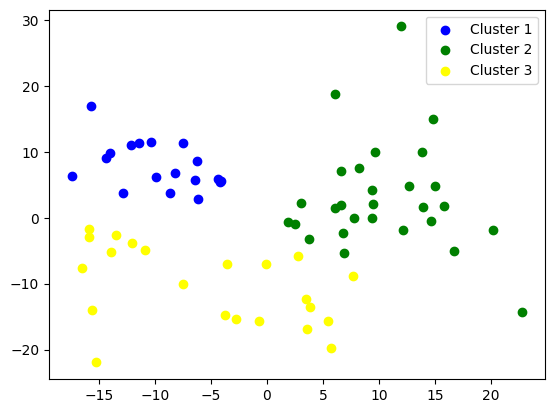

In [32]:
#plotting
plt.scatter(df1['P1'],df1['P2'],color='blue', label= "Cluster 1")
plt.scatter(df2['P1'],df2['P2'],color='green', label = "Cluster 2")
plt.scatter(df3['P1'],df3['P2'],color='yellow', label = "Cluster 3")
plt.legend()
plt.show()